<font size="4">**Importing Required Libraries**</font> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style= "whitegrid", font_scale=1.3)

In [2]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
 

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
import spacy
nlp = spacy.load('en_core_web_md') 

<font size="4">**Loading the Dataset**</font> 

In [4]:
df= pd.read_csv('zomato.csv')

<font size="4">**Examining the Dataset**</font>

In [5]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFu...,"942, 21st Main Road, 2nd Stage, Banashankari, Bangalore",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephant-banashankari?context=eyJzZSI6eyJlIjpbIjU4Njk0IiwxODM3NTQ3NCwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHM...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th Block, Kathriguppe, 3rd Stage, Banashankari, Bangalore",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is ...",[],Buffet,Banashankari


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

<font size="6">**Data Preparation and Processing**</font>

<font size="3">**(1) Calculating % of missing values in each column**</font>

In [7]:
a = df.isnull().sum()/len(df)*100
missing_data = pd.DataFrame({'Missing Value %' :a}).sort_values('Missing Value %',ascending=False)
missing_data.head(8)

,Missing Value %
dish_liked,54.291626
rate,15.033741
phone,2.335789
approx_cost(for two people),0.669026
rest_type,0.438927
cuisines,0.087012
location,0.040606
listed_in(type),0.000000


<font size="3">**Processing column with missing values**</font>

In [8]:
df['dish_liked'].fillna(value='None', inplace = True)

In [9]:
len(df['rate'].value_counts()) # there are 64 different types of ratings.

64

In [10]:
df['rate'].replace(['NEW','-'],[3,0],inplace = True) #Replacing ratings for NEW resturants with 3 rating

<br>

<font size="3">From now onwards we'll work with a new dataframe **df3** which is copy of the orignal dataframe df, such that any changes in the dataframe df3 won't affect the orignal dataframe.</font>

In [11]:
df3 = df.copy(deep = True)

<font size="3"> Converting data type of those columns which should be treated as numeric</font>

In [12]:
df3['rate']= df3['rate'].astype(str)

In [13]:
df3['rate'] = df3['rate'].apply(lambda x: x[0:3]) # to remove ''/5' from rate column entries

In [14]:
df3['rate']= df3['rate'].astype(float)

In [15]:
df3['rate'].fillna(value = df3['rate'].mean()).head() #Treating missing values in the rate column

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [16]:
df3.dropna(inplace = True)




<font size="3"> When we view the detailed dataset, we observe that the column 'approx_cost(for two people)' has values in the form og (1,200), (1,400) etc for values above 1000 Rs , due to which the column can't be treated as numeric data. </font>

<font size="4"> Processing **'approx_cost(for two people)'** column to convert into numeric data </font>

In [17]:
df3.rename(columns = {'approx_cost(for two people)':'approx_cost'},inplace = True)

In [18]:
df3['approx_cost'] = df3['approx_cost'].apply(lambda x: x.replace(',',''))

In [19]:
df3['approx_cost'] = df3['approx_cost'].astype(float)

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42944 entries, 0 to 51716
Data columns (total 17 columns):
url                42944 non-null object
address            42944 non-null object
name               42944 non-null object
online_order       42944 non-null object
book_table         42944 non-null object
rate               42944 non-null float64
votes              42944 non-null int64
phone              42944 non-null object
location           42944 non-null object
rest_type          42944 non-null object
dish_liked         42944 non-null object
cuisines           42944 non-null object
approx_cost        42944 non-null float64
reviews_list       42944 non-null object
menu_item          42944 non-null object
listed_in(type)    42944 non-null object
listed_in(city)    42944 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 5.9+ MB


### Removing Redundant columns

In [21]:
df3 = df3.drop(['url','address','phone','menu_item'], axis = 1)

In [22]:
df3.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is ...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..""), ('Rated 3.0', ""RATED\n \nWe...",Buffet,Banashankari


<font size="3">**Creating my own pallete (for better visualisation)**</font>

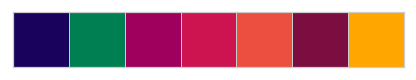

In [23]:
#Creating my own pallete
my_pallete = ['#18025c','#008052','#9f005d','#cd1450','#ec4f3f','#7c0d40','#ffa600']
sns.set_palette(my_pallete)
sns.palplot(sns.color_palette()) #Setting your own palle

In [24]:
df4 = df3.groupby('listed_in(type)')

In [25]:
df4.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for dinner with family. Turned out to be a good choose suitable for all ages of people. Can try this place. We liked the most was their starters. Service is ...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough ??..""), ('Rated 3.0', ""RATED\n \nWe...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper Karnataka style full meals. Been there twice and was fully satisfied.. Will give 5 stars if it's well managed............""), ('Rated 2.0', 'RATED\n ...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant in neighbourhood. Buffet system is properly arranged. Variety of dishes along with garba dance and puppet show. Good spread of desserts. Live paratha ...",Buffet,Banashankari
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Mojito, Pasta, Paneer Tikka, Lime Soda, Prawn Pizza","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really liked this place ! The ambience with the rooftop , plants , the music is great !\nThe starters are good and so were the pizzas.\nThe prices are pretty ...",Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta, Sandwiches","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this place with one of my friends, it's a very small place but decent. And nice place to hangout.\nFood-3.5/5\nAmbience-4/5\nValue for money 3.5/5""), ('Rated...",Cafes,Banashankari
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffle, Tacos, Momos, Cheese Nachos","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3.5/5\nTaste 5/5\nYummy cheesyyy fries ?\nDelicious pasta\nThey're a must try ??\nLoaded nachos and green fries are average!!""), ('Rated 4.0', 'RATED\n...",Cafes,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli Chicken, Sandwich, Coffee, Crepe",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a Saturday afternoon after an hectic day\nThe food was too good\nThe ambience is okay\nBut usually itÃ\x83Ã\x83Ã\x82Ã\x82Ã\x83Ã\x82Ã\x82Ã\x92s ...",Cafes,Banashankari
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken Bbq Wings, Virgin Mojito, Nachos","Cafe, Italian, Continental",600.0,"[('Rated 1.0', ""RATED\n \n\nHorrible. Not even kidding. We ordered BBQ chicken wings and chef's special pizza. They gave undercooked chicken wings and the sauce on it was not even BBQ sauce. It wa...",Cafes,Banashan

(0, 4.5)

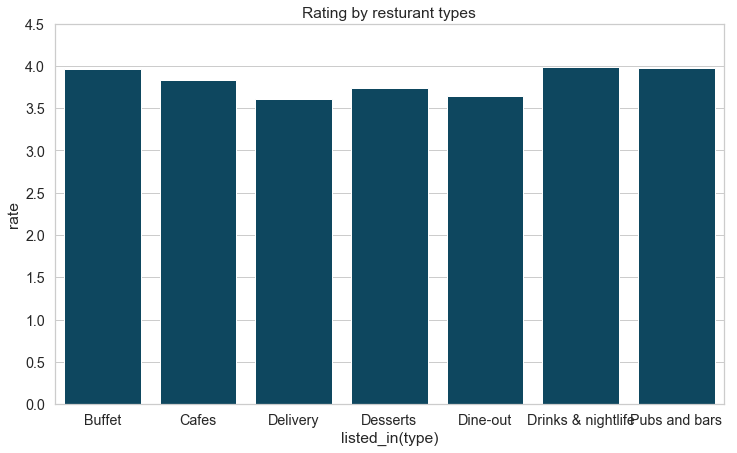

In [26]:

fig = plt.subplots(figsize=(12, 7))
ax = sns.barplot(x = 'listed_in(type)', y = 'rate', data = df3 , ci = None,color='#004c6d').set_title('Rating by resturant types')
ax = plt.gca()
ax.set_ylim([0,4.5])

In [27]:
#df4 = df3.copy(deep = True)

In [28]:
#df4['rest_type'] = df4['rest_type'].apply(lambda x : x.split(',',1)[0])

In [29]:
#word.split(',', 1)[0]

<font size="4">**Average cost by resturant type**</font>

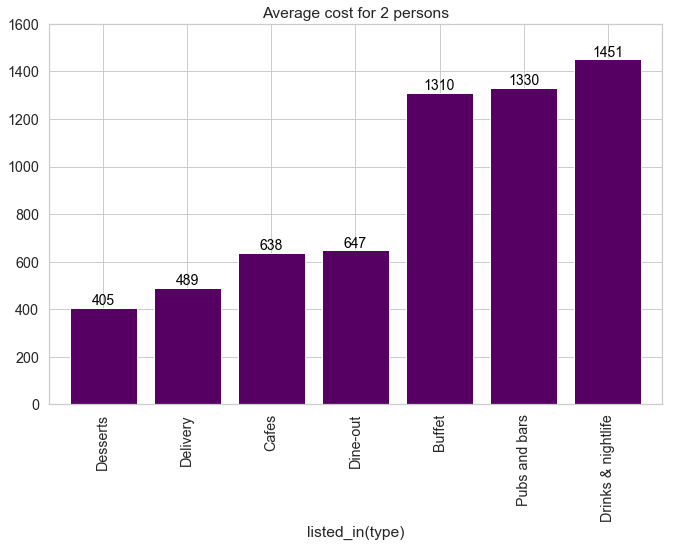

In [30]:
fig = plt.subplots(figsize=(11, 7))
ax = df3.groupby('listed_in(type)')['approx_cost'].mean().sort_values(ascending = True).plot(kind = 'bar',color = '#560063',title ='Average cost for 2 persons',width = 0.8)
ax = plt.gca()
ax.set_ylim([0,1600]) #to set limit on y axis
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='Black', ha='center', va='bottom')

plt.show()

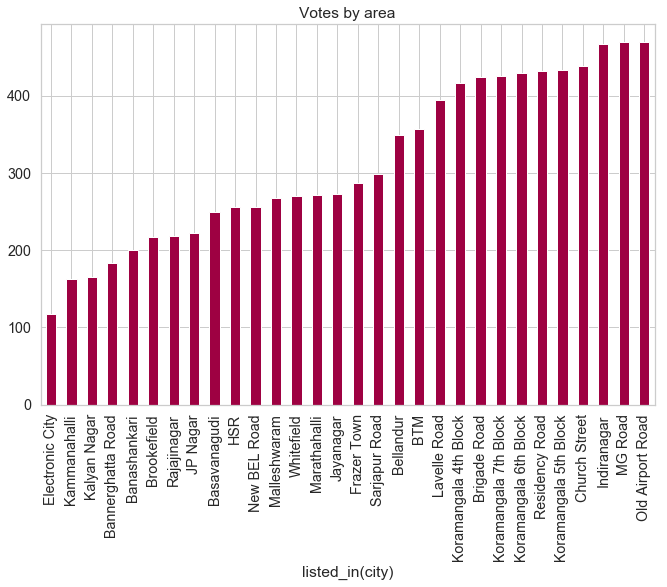

In [31]:
fig = plt.subplots(figsize=(11, 7))
ax = df3.groupby('listed_in(city)')['votes'].mean().sort_values(ascending = True).plot(kind = 'bar',colormap = 'Spectral',title ='Votes by area')


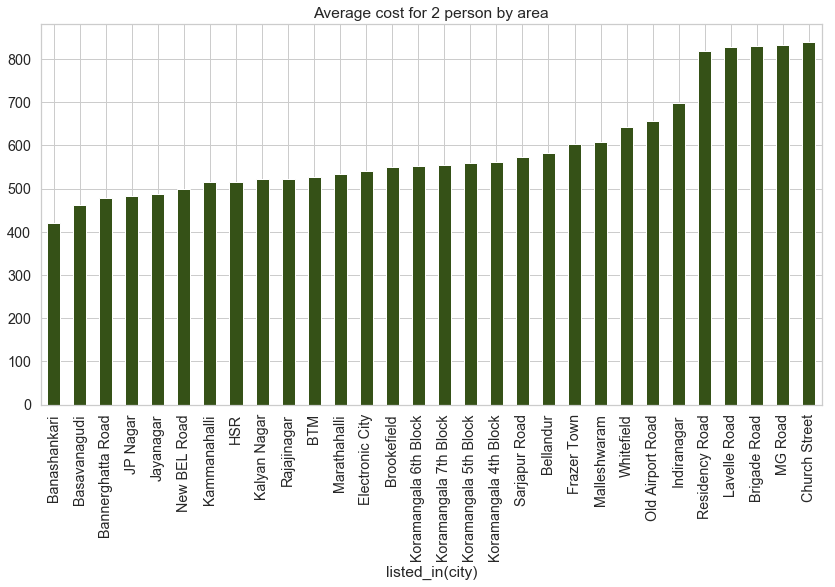

In [32]:
fig = plt.subplots(figsize=(14, 7))
ax = df3.groupby('listed_in(city)')['approx_cost'].mean().sort_values(ascending = True).plot(kind = 'bar',color = '#355117',title ='Average cost for 2 person by area')

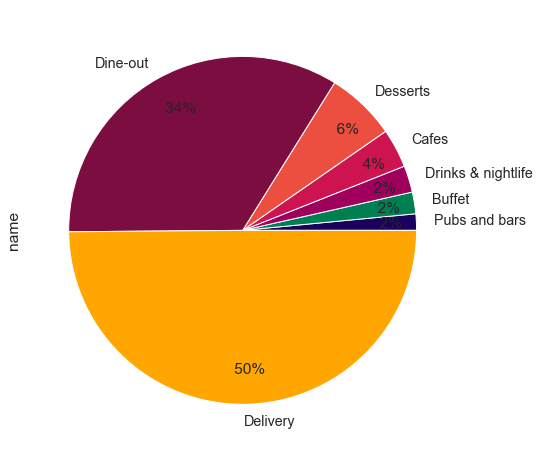

In [33]:
fig = plt.subplots(figsize=(14,8))
plt.gca()
ax= df3.groupby('listed_in(type)')['name'].count().sort_values().plot(kind = 'pie', autopct='%5.0f%%', pctdistance=.8,startangle=0)


In [34]:
df6 = pd.DataFrame(df3.groupby('listed_in(type)')['name'].count()/len(df3)*100)

In [35]:
df6.rename(columns={'name':'percentage occurence'})

,percentage occurence
listed_in(type),
Buffet,2.014251
Cafes,3.620995
Delivery,49.869598
Desserts,6.489847
Dine-out,34.002422
Drinks & nightlife,2.479974
Pubs and bars,1.522914


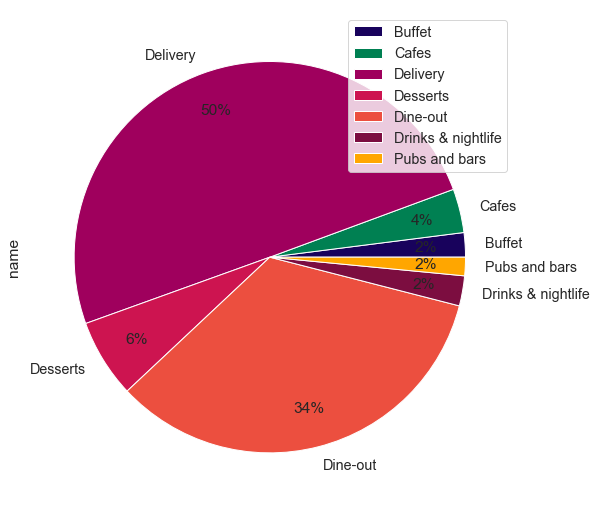

In [36]:
ax= df6.plot(kind = 'pie', autopct='%1.0f%%',pctdistance=.8,subplots = True,figsize = (16,9),layout = None)

In [37]:
df3['dish_liked'].value_counts()

None                                                                                                                               19751
Biryani                                                                                                                              181
Chicken Biryani                                                                                                                       73
Friendly Staff                                                                                                                        69
Waffles                                                                                                                               68
Paratha                                                                                                                               57
Masala Dosa                                                                                                                           56
Rooftop Ambience                         

In [38]:
def func2(df, col):
    my_list = []
    for i in df[col]:
        list = i.split(',')
        my_list.extend(list)
    return my_list

In [39]:
df_most_liked_dish = pd.DataFrame(func2(df3,'dish_liked'))

In [40]:
df_most_liked_dish.columns = ['dish_name']

In [41]:
df_most_liked_dish.drop(df_most_liked_dish[df_most_liked_dish['dish_name'] == 'None'].index, inplace = True)

In [42]:
df_most_liked_dish = pd.DataFrame(df_most_liked_dish['dish_name'].value_counts())

In [43]:
df_most_liked_dish.head(10)

,dish_name
Pasta,2660
Pizza,1917
Cocktails,1876
Burgers,1728
Mocktails,1599
Biryani,1316
Sandwiches,1281
Burgers,1240
Nachos,1171
Coffee,1156


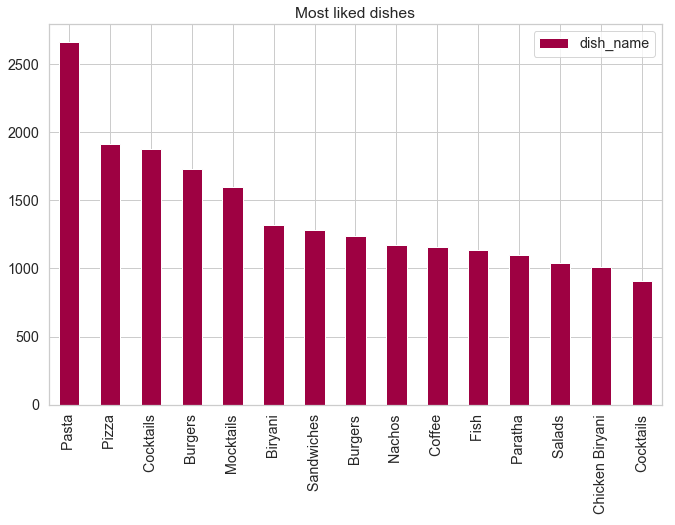

In [44]:
df_most_liked_dish.head(15).plot(kind = 'bar',colormap = 'Spectral',title ='Most liked dishes',figsize=(11, 7))

In [45]:
df4 = df3.drop_duplicates(subset = 'name',keep = 'first')

<br>

### Most liked Cuisines

In [46]:
def func2(df,col):
    my_list2 = []
    for i in df[col]:
        list = i.split(',')
        my_list2.extend(list)
    return my_list2

In [47]:
df_most_liked_cuisine = pd.DataFrame(func2(df4,'cuisines'))

In [48]:
df_most_liked_cuisine.columns = ['cuisine_type']

In [49]:
df_most_liked_cuisine['cuisine_type'] = df_most_liked_cuisine['cuisine_type'].apply(lambda x : x.replace(' ',''))

In [50]:
df_most_liked_cuisine['cuisine_type'].value_counts()

NorthIndian      3211
Chinese          2422
SouthIndian      1445
FastFood         1034
Biryani           928
Continental       729
Desserts          539
Beverages         521
Cafe              514
StreetFood        400
Italian           380
Bakery            302
Andhra            294
Seafood           266
Mughlai           225
Kerala            223
Pizza             215
Rolls             205
Burger            184
Asian             173
IceCream          169
Momos             162
Juices            161
FingerFood        149
American          148
Arabian           146
Thai              132
Mithai            130
Sandwich          115
Salad             114
                 ... 
Greek               4
Assamese            3
Afghani             3
Tamil               3
Naga                3
Iranian             3
African             2
Parsi               2
PanAsian            2
SriLankan           2
BubbleTea           2
British             2
SouthAmerican       2
Cantonese           1
German    

In [51]:
df_most_liked_cuisine = pd.DataFrame(df_most_liked_cuisine['cuisine_type'].value_counts())

In [52]:
df_most_liked_cuisine.head()

,cuisine_type
NorthIndian,3211
Chinese,2422
SouthIndian,1445
FastFood,1034
Biryani,928


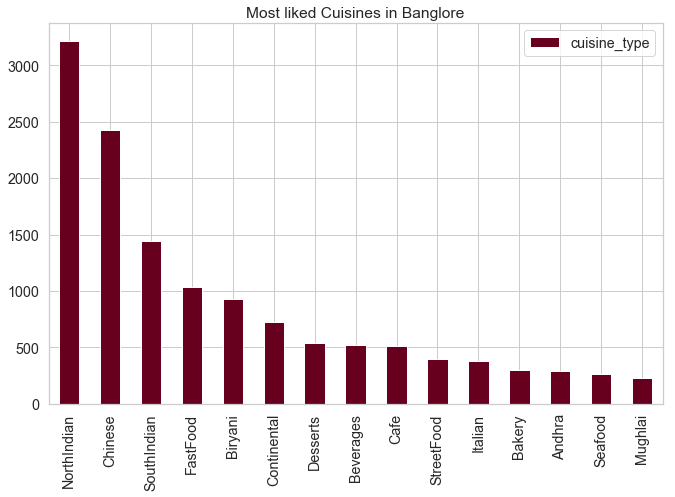

In [53]:
df_most_liked_cuisine.head(15).plot(kind = 'bar',colormap = 'RdGy',title ='Most liked Cuisines in Banglore',figsize=(11, 7))

<br>

## Applying NLP on Reviews from customers

### 1. Removing Punctuations, Numbers, and Special Characters

In [54]:
df3['reviews_list_new'] = df3['reviews_list'].str.replace("[^a-zA-Z']", " ") 

In [55]:
df3['reviews_list_new'].loc[0]

"  'Rated    '  'RATED n  A beautiful place to dine in The interiors take you back to the Mughal era  The lightings are just perfect We went there on the occasion of Christmas and so they had only limited items available  But the taste and service was not compromised at all The only complaint is that the breads could have been better Would surely like to come here again '    'Rated    '  'RATED n  I was here for dinner with my family on a weekday  The restaurant was completely empty  Ambience is good with some good old hindi music  Seating arrangement are good too  We ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  Food was fresh and good  service is good too  Good for family hangout  nCheers'    'Rated    '  'RATED n  Its a restaurant near to Banashankari BDA  Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  On inquiring they said this place is mostly vis

### 2. Lower case

In [56]:
df3['reviews_list_new'] = df3['reviews_list_new'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [57]:
df3['reviews_list_new'] = df3['reviews_list_new'].str.replace("rated", " ") 

In [58]:
df3['reviews_list_new'].head()

0    '  ' '  n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items av...
1    '  ' '  n had been here for dinner with family turned out to be a good choose suitable for all ages of people can try this place we liked the most was their starters service is good prices are aff...
2    '  '   n ambience is not that good enough and it's not a pocket friendly cafe and the quantity is not that good and desserts are too good enough '  '   n nwent there for a quick bite with friends ...
3    '  '   n great food and proper karnataka style full meals been there twice and was fully satisfied will give stars if it's well managed '  ' '  n reached the place at pm on saturday half of the it...
4    '  ' '  n very good restaurant in neighbourhood buffet system is properly arranged variety of dishes along with garba dance and puppet show good spread of desserts live parath

<font size ='3'> Removing words with less than 3 characters like we,us etc.</font>

In [59]:
type(df3['reviews_list_new'].loc[0])

str

In [60]:
spacy_stopwords = nlp.Defaults.stop_words

In [61]:
nlp.Defaults.stop_words.add('btw')
nlp.Defaults.stop_words.add('u')
nlp.Defaults.stop_words.add('ur')
nlp.Defaults.stop_words.add('I')

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True
nlp.vocab['u'].is_stop = True
nlp.vocab['ur'].is_stop = True
nlp.vocab['I'].is_stop = True

In [62]:
def func_stop_spacy(x):
      tokens = x.split()
#     doc = nlp(x)
#     tokens = [token.text for token in doc if not token in spacy_stopwords]
      tokens = [token for token in tokens if not token in spacy_stopwords]
      return tokens

In [63]:
df3['reviews_list_new'] = df3['reviews_list_new'].apply(func_stop_spacy)

In [64]:
df3['reviews_list_new'].loc[7]

["'",
 "'",
 "'",
 'n',
 'personally',
 'liked',
 'place',
 'ambience',
 'rooftop',
 'plants',
 'music',
 'great',
 'nthe',
 'starters',
 'good',
 'pizzas',
 'nthe',
 'prices',
 'pretty',
 'affordable',
 'visit',
 'place',
 "'",
 "'",
 "'",
 "'",
 'n',
 'good',
 'pizza',
 'took',
 'unlimited',
 'pizza',
 'eat',
 'pizzas',
 'easily',
 'person',
 'service',
 'good',
 'staff',
 'courteous',
 "polite'",
 "'",
 "'",
 "'",
 'n',
 'onward',
 'favourite',
 'place',
 'pizza',
 'time',
 'happy',
 'hour',
 'pizzas',
 'pizza',
 'combos',
 'relished',
 'pizzas',
 'fluffy',
 'right',
 'sauce',
 'toppings',
 'cheer',
 "'",
 "'",
 "'",
 "'",
 'n',
 'onesta',
 'serves',
 'unlimited',
 'pizza',
 'desserts',
 'pasta',
 'nthis',
 'places',
 'multiple',
 'branches',
 'city',
 'usually',
 'crowded',
 'weekends',
 'nservice',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 's',
 'good',
 'decent',
 'nprices',
 'affordable',
 'nfood',
 'desserts',
 'shakes',
 'good',
 'nbut',
 'pizzas',
 'thick',
 'base',
 '

In [66]:
df3['reviews_list_11'] = df3['reviews_list_new'].apply(lambda x: [w for w in x if len(w)>2])

In [67]:
df3['reviews_list_11'].loc[7]

['personally',
 'liked',
 'place',
 'ambience',
 'rooftop',
 'plants',
 'music',
 'great',
 'nthe',
 'starters',
 'good',
 'pizzas',
 'nthe',
 'prices',
 'pretty',
 'affordable',
 'visit',
 'place',
 'good',
 'pizza',
 'took',
 'unlimited',
 'pizza',
 'eat',
 'pizzas',
 'easily',
 'person',
 'service',
 'good',
 'staff',
 'courteous',
 "polite'",
 'onward',
 'favourite',
 'place',
 'pizza',
 'time',
 'happy',
 'hour',
 'pizzas',
 'pizza',
 'combos',
 'relished',
 'pizzas',
 'fluffy',
 'right',
 'sauce',
 'toppings',
 'cheer',
 'onesta',
 'serves',
 'unlimited',
 'pizza',
 'desserts',
 'pasta',
 'nthis',
 'places',
 'multiple',
 'branches',
 'city',
 'usually',
 'crowded',
 'weekends',
 'nservice',
 'good',
 'decent',
 'nprices',
 'affordable',
 'nfood',
 'desserts',
 'shakes',
 'good',
 'nbut',
 'pizzas',
 'thick',
 'base',
 'ones',
 'order',
 'cheesy',
 'generous',
 'topping',
 'taste',
 'nthe',
 'choclate',
 'banana',
 'pizza',
 'disappointment',
 "raw'",
 'like',
 'going',
 'place',

In [68]:
df3['tidy_reviews_list'] = df3['reviews_list_11'].apply(lambda x: " ".join(str(i) for i in x))

In [69]:
df3['tidy_reviews_list'].shape

(42944,)

### Removing most common occuring words

In [ ]:
# freq = pd.Series(' '.join(df3['tidy_reviews_list']).split()).value_counts()[:6]
# freq

In [ ]:
# freq2 = pd.Series(' '.join(df3['tidy_reviews_list']).split()).value_counts()[:10]
# freq2

In [ ]:
# # freq_df = pd.DataFrame(freq, columns = ['a'])
# # freq_list = list(freq_df['a'])
# freq_list = ['place','good','food']
# df3['tidy_reviews_list'] = df3['tidy_reviews_list'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_list))
# df3['tidy_reviews_list'].head()

### Visualization Using WordCloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def func_visualize(list_of_words):
     wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(list_of_words)
     plt.figure(figsize=(10, 7)) 
     plt.imshow(wordcloud, interpolation="bilinear") 
     plt.axis('off') 
     plt.show()

### Best reviews

<font size ='3'> Most occuring words in best reviews</font>

In [ ]:
normal_words =' '.join([text for text in df3['tidy_reviews_list'][df3['rate'] > 4.2]])

In [ ]:
func_visualize(normal_words)

<font size = '4'>The above visualization tells us that Quality of main course, service, ambience and nature of staff is the most important judging criterion for the customers in banglore.</font>

In [ ]:
df3['tidy_reviews_list'][df3['rate'] < 3].shape

### Bad reviews

<font size = '3'> Most occuring words in less than average reviews</font>

In [ ]:
normal_words2 =' '.join([text for text in df3['tidy_reviews_list'][df3['rate'] < 3]])

In [ ]:
func_visualize(normal_words2)

<font size = '4'>The above visualization tells us that north indian food, non veg food and delivered food is not good in banglore.</font>

In [ ]:
list_adjectives = []

In [ ]:
list_adjectives =  df3['tidy_reviews_list'][df3['rate'] > 4.2].loc[0:4000].apply(lambda x: [token.text for token in nlp(x) if (token.pos_ == 'ADJ' )])

In [ ]:
df_good_reviews = pd.DataFrame(list_adjectives)

<br>


In [ ]:
df_good_reviews['Tidy_good_review'] = df_good_reviews['tidy_reviews_list'].apply(lambda x: " ".join(str(i) for i in x))

In [ ]:
df_good_reviews.head(2)

In [ ]:
normal_good_words =' '.join([text for text in df_good_reviews['Tidy_good_review']])

In [ ]:
func_visualize(normal_good_words)

In [ ]:
list_bad_adjectives

In [ ]:
list_bad_adjectives = []

In [ ]:
list_bad_adjectives =  df3['tidy_reviews_list'][df3['rate'] <= 3.0].loc[0:2200].apply(lambda x: [token.text for token in nlp(x) if (token.pos_ == 'ADJ' )])

In [ ]:
df_bad_reviews = pd.DataFrame(list_bad_adjectives)

In [ ]:
df_bad_reviews['Tidy_bad_review'] = df_bad_reviews['tidy_reviews_list'].apply(lambda x: " ".join(str(i) for i in x))

In [ ]:
df_bad_reviews.head(2)

In [ ]:
normal_bad_words =' '.join([text for text in df_bad_reviews['Tidy_bad_review']])

In [ ]:
func_visualize(normal_bad_words)

<br>

## DEFINING BEST RESTURANT ON THE BASIS OF 3 PARAMETERS

#### 1. No. of Votes - (Reliability)
#### 2. Rating
#### 3. Average Cost

In [77]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42944 entries, 0 to 51716
Data columns (total 17 columns):
url                42944 non-null object
address            42944 non-null object
name               42944 non-null object
online_order       42944 non-null object
book_table         42944 non-null object
rate               42944 non-null float64
votes              42944 non-null int64
phone              42944 non-null object
location           42944 non-null object
rest_type          42944 non-null object
dish_liked         42944 non-null object
cuisines           42944 non-null object
approx_cost        42944 non-null float64
reviews_list       42944 non-null object
menu_item          42944 non-null object
listed_in(type)    42944 non-null object
listed_in(city)    42944 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 7.1+ MB


In [78]:
df_3 = df3[['name','rate','votes','dish_liked','approx_cost','listed_in(type)']]

In [79]:
df_3= df_3.drop_duplicates(subset='name',keep='first')

In [80]:
Q3_votes = np.percentile(df_3['votes'],75)

In [81]:
df_3_most_reliable = df_3[df_3['votes']> Q3_votes ]

In [82]:
df_3_affordable = df_3[df_3['approx_cost'] <  1500] #Resturants lower than 25 quaruntile in terms of cost

In [83]:
#Q3_rateing = np.percentile(df_3['rate'],75)

In [84]:
df_3_highest_rated = df_3[df_3['rate'] >= 4.5 ]

In [85]:
df_best_1 = pd.merge(df_3_highest_rated,df_3_affordable,how='inner',on=['name'])

In [86]:
df_best_1.shape

(74, 11)

In [87]:
df_best = pd.merge(df_best_1,df_3_most_reliable,how='inner',on=['name'])

In [88]:
df_best = df_best.iloc[0:,:6]

In [89]:
df_best

,name,rate_x,votes_x,dish_liked_x,approx_cost_x,listed_in(type)_x
0,Onesta,4.6,2556,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...",600.0,Cafes
1,The Blue Wagon - Kitchen,4.6,228,"Pizza, Nachos, Garlic Maggi, Burgers, Cheese M...",400.0,Delivery
2,Shakes Theory,4.5,155,"Sandwiches, Thick Shakes, Paan Shake, Brownie ...",300.0,Delivery
3,Taaza Thindi,4.7,651,"Masala Dosa, Vada, Upma, Filter Coffee, Kesari...",100.0,Dine-out
4,Galito's,4.6,404,"Chicken Grill, Garlic Bread, Mocktails, Burger...",1000.0,Delivery
5,Hakuna Matata,4.5,2781,"Mocktails, Cocktails, Appam, Paneer Satay, Sea...",1200.0,Dine-out
6,Hunger Camp,4.6,311,"Tandoori Chicken, Chicken Sukha, Chicken Birya...",1300.0,Dine-out
7,Pin Me Down,4.5,784,"Paneer Tikka, Chowmein, Pizza, Mocktails, Tand...",800.0,Delivery
8,Milano Ice Cream,4.5,197,"Chocolate Sundae, Gelato Ice Cream, Chocolate ...",400.0,Desserts
9,Mavalli Tiffin Room (MTR),4.5,2896,"Rava Idli, Filter Coffee, Ghee Masala Dosa, Ba...",250.0,Dine-out
